In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
import pandas as pd
import numpy as np

In [2]:
sc = SparkContext('local')
sqlCtx = SQLContext(sc)

# 1번

In [22]:
kRdd = sc.textFile('../data1/k.txt')
kRdd.flatMap(lambda v:v.split()).map(lambda v:(v,1)).reduceByKey(lambda a,b:a+b).sortBy(lambda v:v[1],ascending  = False).collect()

[('원내대표는', 7),
 ('질문에', 7),
 ('것은', 5),
 ('여야', 4),
 ('하는', 4),
 ('말했다.', 4),
 ('3당', 3),
 ('위해', 3),
 ('문', 3),
 ('이인영', 3),
 ('나경원', 3),
 ('오신환', 3),
 ('바른미래당', 3),
 ('회동을', 3),
 ('갖고', 3),
 ('국회정상화에', 3),
 ('민주당', 3),
 ('6월', 3),
 ('후보자', 3),
 ('국세청장', 3),
 ('기자들과', 3),
 ('만나', 3),
 ('전했다.', 3),
 ('게', 3),
 ('나', 3),
 ('대한', 3),
 ("것이냐'는", 3),
 ('국회에서', 3),
 ('생각한다"고', 3),
 ('문희상', 2),
 ('국회의장과', 2),
 ('교섭단체', 2),
 ('18일', 2),
 ('국회정상화를', 2),
 ('자유한국당,', 2),
 ('오후', 2),
 ('이', 2),
 ('합의할', 2),
 ('요청한', 2),
 ('것으로', 2),
 ('한국당이', 2),
 ('경우', 2),
 ('윤석열', 2),
 ('검찰총장', 2),
 ('김현준', 2),
 ('일정이', 2),
 ('제대로', 2),
 ('합의를', 2),
 ('이어', 2),
 ('묻는', 2),
 ('것', 2),
 ('후보자에', 2),
 ('한', 2),
 ('것이', 2),
 ('일부', 2),
 ('문제가', 2),
 ('그', 2),
 ('국회가', 2),
 ('있다.', 2),
 ('대해', 2),
 ('민주당이', 2),
 ('대승적', 2),
 ('오', 2),
 ('있는', 2),
 ('위한', 2),
 ('해야', 2),
 ('대표가', 1),
 ('머리를', 1),
 ('맞댔지만', 1),
 ('의미있는', 1),
 ('결론을', 1),
 ('내리지', 1),
 ('못했다.', 1),
 ('의장과', 1),
 ('더불어민주당,', 1),
 ('이날', 1),
 ('국회의장실에서'

In [ ]:
# rdd1.flatMap( lambda x: x.split() ).map( lambda x: (x,1) ).reduceByKey(lambda a,b: a+b ).sortBy(lambda v: v[1], ascending=False ).collect()

# 2번

In [25]:
birthRdd = sc.textFile('../data/births.txt')

In [31]:
birthRdd1=birthRdd.map(lambda v:v.split(',')).\
        map(lambda v:(int(v[0]),int(v[1]),int(v[2])))

- 1번

In [33]:
print('남아수합',birthRdd1.map(lambda v:v[1]).sum())
print('남아수평균',birthRdd1.map(lambda v:v[1]).mean())

남아수합 161802441
남아수평균 1225776.0681818184


- 2번

In [81]:
print(birthRdd1.map(lambda v:float(v[2])).sum())
print(birthRdd1.map(lambda v:float(v[2])).mean())

164392696.0
1245399.2121212124


- 3번

In [80]:
birthRdd1.sortBy( lambda v: float(v[1]), ascending=False).take(5)

[(1957, 2044160, 2155866),
 (1959, 2023044, 2133509),
 (1960, 2022093, 2132717),
 (1961, 2017316, 2122502),
 (1958, 2010884, 2120712)]

- 4번

### 전체비율

In [39]:
totM = birthRdd1.map(lambda v:v[1]).sum()
totW = birthRdd1.map(lambda v:v[2]).sum()
print('남아수비율',totM/(totM+totW))

남아수비율 0.49602959286299847


## 개별비율

In [ ]:
birthRdd1.map( lambda v: v[1]/(v[1]+v[2]) ).collect()

- 5번

In [138]:
birthRdd1.map( lambda v: int(v[2])).histogram(10)

[32, 1, 2, 2, 22, 3, 4, 11, 30, 25]

# 3번

In [41]:
df = sqlCtx.read.csv('../data1/CCTV_in_Seoul.csv',header = True,inferSchema = True)

- 1번

In [82]:
sqlKang = "select * from cctv where `기관명` rlike '강' "
dfKang = sqlCtx.sql( sqlKang )
dfKang.show()

+------+----+-------------+------+------+------+
|기관명|소계|2013년도 이전|2014년|2015년|2016년|
+------+----+-------------+------+------+------+
|강남구|2780|         1292|   430|   584|   932|
|강동구| 773|          379|    99|   155|   377|
|강북구| 748|          369|   120|   138|   204|
|강서구| 884|          388|   258|   184|    81|
+------+----+-------------+------+------+------+



- 2번

In [42]:
df.show()

+--------+----+-------------+------+------+------+
|  기관명|소계|2013년도 이전|2014년|2015년|2016년|
+--------+----+-------------+------+------+------+
|  강남구|2780|         1292|   430|   584|   932|
|  강동구| 773|          379|    99|   155|   377|
|  강북구| 748|          369|   120|   138|   204|
|  강서구| 884|          388|   258|   184|    81|
|  관악구|1496|          846|   260|   390|   613|
|  광진구| 707|          573|    78|    53|   174|
|  구로구|1561|         1142|   173|   246|   323|
|  금천구|1015|          674|    51|   269|   354|
|  노원구|1265|          542|    57|   451|   516|
|  도봉구| 485|          238|   159|    42|   386|
|동대문구|1294|         1070|    23|   198|   579|
|  동작구|1091|          544|   341|   103|   314|
|  마포구| 574|          314|   118|   169|   379|
|서대문구| 962|          844|    50|    68|   292|
|  서초구|1930|         1406|   157|   336|   398|
|  성동구|1062|          730|    91|   241|   265|
|  성북구|1464|         1009|    78|   360|   204|
|  송파구| 618|          529|    21|    68|   46

In [45]:
df.createOrReplaceTempView('cctv')

In [54]:
sql = 'select * from cctv'
df = sqlCtx.sql(sql)
df.show()

+--------+----+-------------+------+------+------+
|  기관명|소계|2013년도 이전|2014년|2015년|2016년|
+--------+----+-------------+------+------+------+
|  강남구|2780|         1292|   430|   584|   932|
|  강동구| 773|          379|    99|   155|   377|
|  강북구| 748|          369|   120|   138|   204|
|  강서구| 884|          388|   258|   184|    81|
|  관악구|1496|          846|   260|   390|   613|
|  광진구| 707|          573|    78|    53|   174|
|  구로구|1561|         1142|   173|   246|   323|
|  금천구|1015|          674|    51|   269|   354|
|  노원구|1265|          542|    57|   451|   516|
|  도봉구| 485|          238|   159|    42|   386|
|동대문구|1294|         1070|    23|   198|   579|
|  동작구|1091|          544|   341|   103|   314|
|  마포구| 574|          314|   118|   169|   379|
|서대문구| 962|          844|    50|    68|   292|
|  서초구|1930|         1406|   157|   336|   398|
|  성동구|1062|          730|    91|   241|   265|
|  성북구|1464|         1009|    78|   360|   204|
|  송파구| 618|          529|    21|    68|   46

In [53]:
sql = 'select `기관명`,round((`2014년`+`2015년`+`2016년`)/`2013년도 이전`,2) as `비율` from cctv'
df = sqlCtx.sql(sql)
df.show()

+--------+----+
|  기관명|비율|
+--------+----+
|  강남구|1.51|
|  강동구|1.66|
|  강북구|1.25|
|  강서구|1.35|
|  관악구|1.49|
|  광진구|0.53|
|  구로구|0.65|
|  금천구| 1.0|
|  노원구|1.89|
|  도봉구|2.47|
|동대문구|0.75|
|  동작구|1.39|
|  마포구|2.12|
|서대문구|0.49|
|  서초구|0.63|
|  성동구|0.82|
|  성북구|0.64|
|  송파구|1.04|
|  양천구|0.35|
|영등포구|1.58|
+--------+----+
only showing top 20 rows



- 3번
### 3. 증가율이 가장높은 top 5를 보여주시요
### 증가율:  (14+15+16)/(2013년이전 )

In [90]:
sql = 'select `기관명`,round((`2014년`+`2015년`+`2016년`)/`2013년도 이전`,2) as `비율` from cctv order by `비율` desc limit 5'
df = sqlCtx.sql(sql)
df.show()

+------+----+
|기관명|비율|
+------+----+
|종로구|2.49|
|도봉구|2.47|
|마포구|2.12|
|노원구|1.89|
|강동구|1.66|
+------+----+



- 4번

In [104]:
# sql = "select substr( `기관명`,1, length(`기관명`)-1 ) as s from cctv"
sqlDist = "select *,substr(`기관명`,-4,3) as `기관` from cctv"
dfDist = sqlCtx.sql( sqlDist )
dfDist.show()

+--------+----+-------------+------+------+------+------+
|  기관명|소계|2013년도 이전|2014년|2015년|2016년|  기관|
+--------+----+-------------+------+------+------+------+
|  강남구|2780|         1292|   430|   584|   932|  강남|
|  강동구| 773|          379|    99|   155|   377|  강동|
|  강북구| 748|          369|   120|   138|   204|  강북|
|  강서구| 884|          388|   258|   184|    81|  강서|
|  관악구|1496|          846|   260|   390|   613|  관악|
|  광진구| 707|          573|    78|    53|   174|  광진|
|  구로구|1561|         1142|   173|   246|   323|  구로|
|  금천구|1015|          674|    51|   269|   354|  금천|
|  노원구|1265|          542|    57|   451|   516|  노원|
|  도봉구| 485|          238|   159|    42|   386|  도봉|
|동대문구|1294|         1070|    23|   198|   579|동대문|
|  동작구|1091|          544|   341|   103|   314|  동작|
|  마포구| 574|          314|   118|   169|   379|  마포|
|서대문구| 962|          844|    50|    68|   292|서대문|
|  서초구|1930|         1406|   157|   336|   398|  서초|
|  성동구|1062|          730|    91|   241|   265|  

- 5번

In [56]:
sql = 'select sum(`2015년`) as `2015년 cctv합` from cctv'
df = sqlCtx.sql(sql)
df.show()

+-------------+
|2015년 cctv합|
+-------------+
|         5130|
+-------------+



In [121]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

- 6번

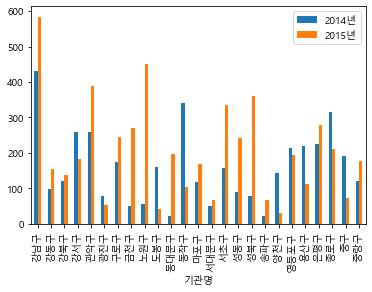

In [123]:
sql = 'select `기관명`,`2014년`,`2015년`from cctv'
df = sqlCtx.sql(sql)
DF=df.toPandas()
DF.set_index('기관명',inplace = True)
DF.plot(kind = 'bar')
plt.show()

- 7번

In [83]:
# 7. cctv가 가장많은 기관명과 갯수를 구하시요

# sqlMax = "select max(`소계`) from cctv"
# dfMax = sqlCtx.sql( sqlMax )
# dfMax.show()

sqlMax = "select * from cctv where `소계`==(select max(`소계`) from cctv) "
dfMax = sqlCtx.sql( sqlMax )
dfMax.show()

+------+----+-------------+------+------+------+
|기관명|소계|2013년도 이전|2014년|2015년|2016년|
+------+----+-------------+------+------+------+
|강남구|2780|         1292|   430|   584|   932|
+------+----+-------------+------+------+------+



- 8번

In [57]:
sql = '''select *,
         case
             when `소계`>=1500 then '매우많음'
             when `소계`>=1000 then '많음'
             else '보통'
         end as `현황`
         from cctv

'''
df = sqlCtx.sql(sql)
df.show()

+--------+----+-------------+------+------+------+--------+
|  기관명|소계|2013년도 이전|2014년|2015년|2016년|    현황|
+--------+----+-------------+------+------+------+--------+
|  강남구|2780|         1292|   430|   584|   932|매우많음|
|  강동구| 773|          379|    99|   155|   377|    보통|
|  강북구| 748|          369|   120|   138|   204|    보통|
|  강서구| 884|          388|   258|   184|    81|    보통|
|  관악구|1496|          846|   260|   390|   613|    많음|
|  광진구| 707|          573|    78|    53|   174|    보통|
|  구로구|1561|         1142|   173|   246|   323|매우많음|
|  금천구|1015|          674|    51|   269|   354|    많음|
|  노원구|1265|          542|    57|   451|   516|    많음|
|  도봉구| 485|          238|   159|    42|   386|    보통|
|동대문구|1294|         1070|    23|   198|   579|    많음|
|  동작구|1091|          544|   341|   103|   314|    많음|
|  마포구| 574|          314|   118|   169|   379|    보통|
|서대문구| 962|          844|    50|    68|   292|    보통|
|  서초구|1930|         1406|   157|   336|   398|매우많음|
|  성동구|1062|     

# 4번

- 1번

In [73]:
gradeDF.printSchema()

root
 |-- 학년: string (nullable = true)
 |-- 과목: string (nullable = true)
 |-- 결과: string (nullable = true)
 |-- 중간: integer (nullable = true)
 |-- 기말: integer (nullable = true)



In [58]:
gradeDF = sqlCtx.read.csv('../data/grade.csv',header = True,inferSchema = True)
gradeDF.show()

+-----+----+-----+----+----+
| 학년|과목| 결과|중간|기말|
+-----+----+-----+----+----+
|1학년|국어| 좋음|  80|  90|
|1학년|국어| 나쁨|  50|  40|
|1학년|국어| 나쁨|  20|  50|
|1학년|수학| 좋음|  83|  95|
|1학년|수학| 좋음|  93|  86|
|2학년|국어| 나쁨|  44|  65|
|2학년|국어| 좋음|  95|  98|
|2학년|수학| 좋음|  96|  99|
|2학년|수학| 나쁨|  57|  69|
+-----+----+-----+----+----+



In [59]:
gradeDF.createOrReplaceTempView('grade')

- 1번

In [79]:
sql = 'select `학년`,avg(`중간`) as `중간평균`,avg(`기말`) as `기말평균`,sum(`중간`) as `중간총합`,sum(`기말`) as `기말총합` \
        from grade group by `학년`'
gradeDF = sqlCtx.sql(sql)
gradeDF.show()

+-----+--------+--------+--------+--------+
| 학년|중간평균|기말평균|중간총합|기말총합|
+-----+--------+--------+--------+--------+
|2학년|    73.0|   82.75|     292|     331|
|1학년|    65.2|    72.2|     326|     361|
+-----+--------+--------+--------+--------+



- 2번

In [124]:
sqlMid = '''select `학년`, avg(`중간`) as `중간평균` from grade
        group by `학년`
        having avg(`중간`)>=70
        ''' 

sqlMid = sqlCtx.sql( sqlMid )
sqlMid.show()

+-----+--------+
| 학년|중간평균|
+-----+--------+
|2학년|    73.0|
+-----+--------+

